Read hash data from file:

In [10]:
hash_data = []

with open('hashes.txt') as f:
    for line in f:
        line = line.strip()
        if line.startswith("MATCH"):
            # hash line
            words = line.split(" ")

            hash = words[1]
            gen = int(words[4])
            t = int(words[5][1:])
            
            hash_data.append((hash, gen))

Start analysis:

- distribution of timings
- distribution of generations
- repeat hashes

Actually, framerate is very consistent, so can ignore timing.

In [14]:
hash_set = set()
n_dups = 0
for H, G in hash_data:
    if H in hash_set:
        print("dup", H)
        n_dups += 1
    else:
        hash_set.add(H)

print(len(hash_data), "hashes")
print(n_dups, "dup hashes")

1082 hashes
0 dups


In [76]:
from collections import Counter

gen_set = Counter()
n_dups = 0
for H, G in hash_data:
    if G in gen_set:
#         print("dup", G, H)
        gen_set[G] += 1
    else:
        gen_set[G] = 1

print("repeat gen lengths")
print(gen_set.most_common(10))

repeat gen lengths
[(368, 6), (607, 6), (395, 5), (381, 4), (364, 4), (232, 4), (448, 4), (233, 4), (497, 4), (333, 4)]


bounds: 72 3672
mean 715.1173752310536
median 579.0


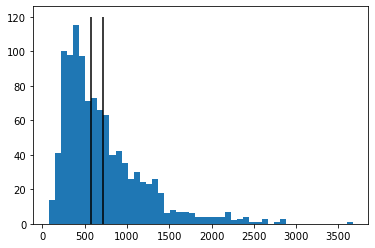

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

gen_list = list(map(lambda x: x[1], hash_data))

plt.hist(gen_list, bins=50)

print("bounds:", min(gen_list), max(gen_list))

x = np.arange(0, max(gen_list))


mean = np.mean(gen_list)
median = np.median(gen_list)
print("mean", mean)
print("median", median)

plt.vlines((mean, median), 0, 120)


plt.show()
